In [31]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math
from copy import deepcopy
 
def padding(pic,k):
    padNum = math.floor(k/2)
    padPic = np.zeros((pic.shape[0]+(2*padNum),pic.shape[1]+(2*padNum)))
    padPic[padNum:padPic.shape[0]-padNum, padNum:padPic.shape[1]-padNum] = pic
    xStart = padNum
    xEnd = padPic.shape[0]-padNum
    yStart = padNum
    yEnd = padPic.shape[1]-padNum
    padPic[xStart:xEnd, yStart:yEnd] = pic
    return padPic

def gausFilter(img,s,q):
    k = math.floor(q/2)
    imgP = padding(img,k)
    out = np.zeros_like(imgP)
    sS = 2 * (s ** 2)
    kern = np.zeros([q,q])
    center = int(q/2)
    for i in range(q):
        for j in range(q):
            kern[i][j] = -1*((i-center)**2 + (j-center)**2)/s
    for i in range(k,imgP.shape[0]-k):
        for j in range(k,imgP.shape[1]-k):
            kernCom = kern
            kernCom = np.exp(kernCom)
            out[i][j] = np.rint(np.sum(imgP[i-center:i+center+1,j-center:j+center+1]*kernCom,axis=(0,1))/np.sum(kernCom,axis=(0,1)))
    out = out[center:out.shape[0]-center,center:out.shape[1]-center]
    return out.astype('uint8')

def HoughCircles(img,circles,rmin,rmax,sinDict,cosDict): 
    rows = img.shape[0] 
    cols = img.shape[1] 
    radius = [i for i in range(rmin,rmax)]
    for r in radius:
        print("Radius value being computed:",r)
        accArray = np.zeros((rows,cols),dtype=np.uint64)
        for i in range(rows):      
#             print('For X: ',i)
            for j in range(cols): 
                if img[i,j] == 255:
                    for deg in range(0,360):
                        sR = round(r*sinDict[deg])
                        sC = round(r*cosDict[deg])
                        b = j - sR
                        a = i - sC 
                        if a >= 0 and a < img.shape[0] and img.shape[1] >= 0 and b < img.shape[1] and img[a,b]==0: 
                            accArray[i][j] += 1                 
        print("Given Radius ",r," and highest value:", np.amax(accArray))       
        for i in range(img.shape[0]//2-20,img.shape[0]//2+20): 
            for j in range(img.shape[1]//2-20,img.shape[1]//2+20): 
                circles.append((i,j,r,accArray[i,j]))

In [12]:
orig_img = cv2.imread('../images/roads.jpg')
input_img = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)

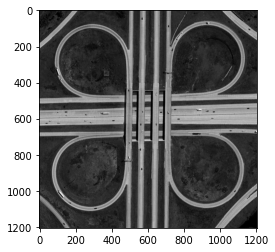

In [13]:
#Steps
#1. Denoise using Gaussian filter and detect edges using canny edge detector
smoothed_img = gausFilter(input_img,3,3)
plt.imshow(smoothed_img,cmap='gray')

In [14]:
dim = (int(input_img.shape[1] * 60 / 100), int(input_img.shape[0] * 60 / 100))
input_img = cv2.resize(input_img, dim, interpolation = cv2.INTER_AREA)

In [15]:
smoothed_img = cv2.resize(smoothed_img, dim, interpolation = cv2.INTER_AREA)

In [16]:
sinDict = dict() 
cosDict = dict() 
for deg in range(0,360): 
    radians = np.pi/180 * deg
    sinDict[deg] = np.sin(radians) 
    cosDict[deg] = np.cos(radians) 

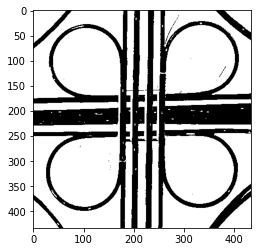

In [17]:
kernel = np.ones((5,5),np.uint8)
grey = cv2.threshold(smoothed_img,97,255,cv2.THRESH_BINARY_INV)[1]
plt.imshow(grey,cmap="gray")
plt.show()

In [205]:
# plt.imshow(grey[20:200,20:200],cmap='gray')

Top left - grey[20:200,20:200] Radius Range = (70,80)<br> 
Top right - grey[10:190,240:420] Radius Range = (75,85)<br>

In [33]:
#4. Top Left circle
circles = []
HoughCircles(grey[20:200,20:200],circles,70,80,sinDict,cosDict)  

R: 70
Given Radius  70  and highest value: 311
R: 71
Given Radius  71  and highest value: 317
R: 72
Given Radius  72  and highest value: 316
R: 73
Given Radius  73  and highest value: 303
R: 74
Given Radius  74  and highest value: 289
R: 75
Given Radius  75  and highest value: 283
R: 76
Given Radius  76  and highest value: 252
R: 77
Given Radius  77  and highest value: 238
R: 78
Given Radius  78  and highest value: 223
R: 79
Given Radius  79  and highest value: 215


In [34]:
print(len(circles))
qw = np.array(circles)
re = qw[:,3]
print(np.amax(qw,axis=0))
print(np.amax(re))

16000
[109. 109.  79. 317.]
317.0


In [87]:
#Top Circle
rew = []
for i in range(len(circles)):
    if circles[i][3]==317:
        rew.append(circles[i][:])
print(len(rew))
rew = np.array(rew)
print(rew)

3
[[ 84.  89.  71. 317.]
 [ 85.  88.  71. 317.]
 [ 85.  89.  71. 317.]]


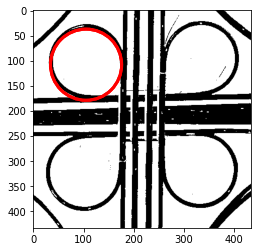

In [91]:
fig, ax = plt.subplots()
ax.imshow(grey,cmap='gray')
circle1 = plt.Circle((85+20, 88+20), 71, color='r', fill=False, linewidth=3)
ax.add_artist(circle1)
ax.add_artist(circle1)
plt.show()

In [206]:
# plt.imshow(grey[0:200,240:440],cmap='gray')

In [94]:
# Detect Right Side Circle 
circles1 = [] 
HoughCircles(grey[0:200,240:440],circles1,70,85,sinDict,cosDict)  

R: 70
Given Radius  70  and highest value: 293
R: 71
Given Radius  71  and highest value: 301
R: 72
Given Radius  72  and highest value: 308
R: 73
Given Radius  73  and highest value: 308
R: 74
Given Radius  74  and highest value: 285
R: 75
Given Radius  75  and highest value: 279
R: 76
Given Radius  76  and highest value: 269
R: 77
Given Radius  77  and highest value: 255
R: 78
Given Radius  78  and highest value: 232
R: 79
Given Radius  79  and highest value: 216
R: 80
Given Radius  80  and highest value: 221
R: 81
Given Radius  81  and highest value: 228
R: 82
Given Radius  82  and highest value: 229
R: 83
Given Radius  83  and highest value: 227
R: 84
Given Radius  84  and highest value: 236


In [96]:
qw = np.array(circles1)
re = qw[:,3]
print(np.amax(qw,axis=0))

[119. 116.  84. 308.]


In [97]:
#Top-right Circle
rewTR = []
for i in range(len(circles1)):
    if circles1[i][3]==308:
        rewTR.append(circles1[i][:])
print(len(rewTR))
rewTR = np.array(rewTR)

3


In [98]:
print(rewTR)

[[ 97.  92.  72. 308.]
 [ 96.  93.  73. 308.]
 [ 96.  94.  73. 308.]]


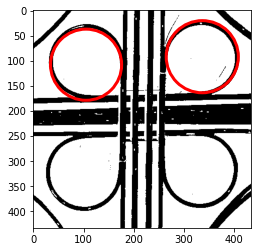

In [110]:
fig, ax = plt.subplots()
ax.imshow(grey,cmap='gray')
circle1 = plt.Circle((85+20, 88+20), 71, color='r', fill=False, linewidth=3)
ax.add_artist(circle1)
circle2 = plt.Circle((97+240, 92), 72, color='r', fill=False, linewidth=3)
ax.add_artist(circle2)
plt.show()

In [207]:
# plt.imshow(grey[220:400,0:200],cmap='gray')

In [125]:
# Detect Left-Down Side Circle 
circles2 = [] 
HoughCircles(grey[220:400,0:200],circles2,70,85,sinDict,cosDict) 

R: 70
Given Radius  70  and highest value: 294
R: 71
Given Radius  71  and highest value: 302
R: 72
Given Radius  72  and highest value: 306
R: 73
Given Radius  73  and highest value: 312
R: 74
Given Radius  74  and highest value: 303
R: 75
Given Radius  75  and highest value: 295
R: 76
Given Radius  76  and highest value: 275
R: 77
Given Radius  77  and highest value: 258
R: 78
Given Radius  78  and highest value: 234
R: 79
Given Radius  79  and highest value: 217
R: 80
Given Radius  80  and highest value: 208
R: 81
Given Radius  81  and highest value: 199
R: 82
Given Radius  82  and highest value: 195
R: 83
Given Radius  83  and highest value: 210
R: 84
Given Radius  84  and highest value: 216


In [126]:
qw = np.array(circles2)
re = qw[:,3]
print(np.amax(qw,axis=0))


[109. 119.  84. 312.]


In [128]:
#Top-right Circle
rewBL = []
for i in range(len(circles2)):
    if circles2[i][3]==312:
        rewBL.append(circles2[i][:])
print(len(rewBL))
rewBL = np.array(rewBL)
print(rewBL)

1
[[101. 104.  73. 312.]]


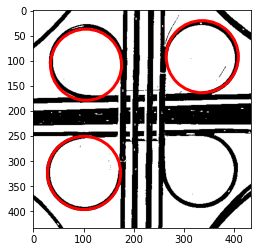

In [131]:
fig, ax = plt.subplots()
ax.imshow(grey,cmap='gray')
circle1 = plt.Circle((85+20, 88+20), 71, color='r', fill=False, linewidth=3)
ax.add_artist(circle1)
circle2 = plt.Circle((97+240, 92), 72, color='r', fill=False, linewidth=3)
ax.add_artist(circle2)
circle3 = plt.Circle((101, 104+220), 73, color='r', fill=False, linewidth=3)
ax.add_artist(circle3)
plt.show()

In [208]:
# plt.imshow(grey[235:400,240:500],cmap='gray')

In [189]:
# Detect Left-Down Side Circle 
circles3 = [] 
HoughCircles(grey[235:400,240:500],circles3,65,80,sinDict,cosDict) 

R: 65
Given Radius  65  and highest value: 169
R: 66
Given Radius  66  and highest value: 170
R: 67
Given Radius  67  and highest value: 179
R: 68
Given Radius  68  and highest value: 231
R: 69
Given Radius  69  and highest value: 284
R: 70
Given Radius  70  and highest value: 301
R: 71
Given Radius  71  and highest value: 307
R: 72
Given Radius  72  and highest value: 309
R: 73
Given Radius  73  and highest value: 321
R: 74
Given Radius  74  and highest value: 321
R: 75
Given Radius  75  and highest value: 308
R: 76
Given Radius  76  and highest value: 289
R: 77
Given Radius  77  and highest value: 265
R: 78
Given Radius  78  and highest value: 238
R: 79
Given Radius  79  and highest value: 226


In [190]:
qw = np.array(circles3)
re = qw[:,3]
print(np.amax(qw,axis=0))

[101. 116.  79. 321.]


In [191]:
#Bottom Right Circle
rewBR = []
for i in range(len(circles3)):
    if circles3[i][3]==321:
        rewBR.append(circles3[i][:])
print(len(rewBR))
rewBR = np.array(rewBR)
print(rewBR)

2
[[ 79.  88.  73. 321.]
 [ 80.  89.  74. 321.]]


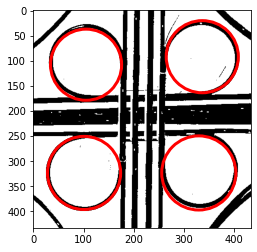

In [204]:
fig, ax = plt.subplots()
ax.imshow(grey,cmap='gray')
# 20:200,20:200 - region for top left circle
circle1 = plt.Circle((85+20, 88+20), 71, color='r', fill=False, linewidth=3)
ax.add_artist(circle1)
# 0:200,240:440 - region for top right circle
circle2 = plt.Circle((97+240, 92), 72, color='r', fill=False, linewidth=3)
ax.add_artist(circle2)
# 220:400,0:200 - region for bottom left circle
circle3 = plt.Circle((101, 104+220), 73, color='r', fill=False, linewidth=3)
ax.add_artist(circle3)
# 235:400,250:500 - region for bottom right circle
circle4 = plt.Circle((80+250, 89+235), 74, color='r', fill=False, linewidth=3)
ax.add_artist(circle4)
plt.show()

In [213]:
orig_img = cv2.cvtColor(orig_img,cv2.COLOR_BGR2RGB)
origC = cv2.resize(orig_img, dim, interpolation = cv2.INTER_AREA)

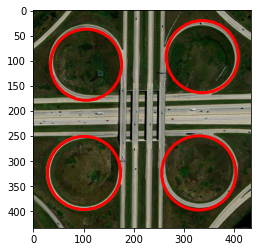

In [214]:
fig, ax = plt.subplots()
ax.imshow(origC,cmap='gray')
# 20:200,20:200 - region for top left circle
circle1 = plt.Circle((85+20, 88+20), 71, color='r', fill=False, linewidth=3)
ax.add_artist(circle1)
# 0:200,240:440 - region for top right circle
circle2 = plt.Circle((97+240, 92), 72, color='r', fill=False, linewidth=3)
ax.add_artist(circle2)
# 220:400,0:200 - region for bottom left circle
circle3 = plt.Circle((101, 104+220), 73, color='r', fill=False, linewidth=3)
ax.add_artist(circle3)
# 235:400,250:500 - region for bottom right circle
circle4 = plt.Circle((80+250, 89+235), 74, color='r', fill=False, linewidth=3)
ax.add_artist(circle4)
plt.show()

In [225]:
# fig, ax = plt.subplots()
# ax.imshow(orig_img,cmap='gray')
# circle1 = plt.Circle((85+20, 88+20), 71, color='r', fill=False, linewidth=3)
# ax.add_artist(circle1)
# circle2 = plt.Circle((97+240, 92), 72, color='r', fill=False, linewidth=3)
# ax.add_artist(circle2)
# circle3 = plt.Circle((101, 104+220), 73, color='r', fill=False, linewidth=3)
# ax.add_artist(circle3)
# circle4 = plt.Circle((80+250, 89+235), 74, color='r', fill=False, linewidth=3)
# ax.add_artist(circle4)
# plt.show()

Radius Values:71,72,73,74

Top left - grey[20:200,20:200] Radius Range = (70,80)<br> 
Vals:
[[ 84.  89.  71. 317.]
 [ 85.  88.  71. 317.]
 [ 85.  89.  71. 317.]]<br>
Top right - grey[0:200,240:440] Radius Range = (70,85)<br>
Vals:
[[ 97.  92.  72. 308.]
 [ 96.  93.  73. 308.]
 [ 96.  94.  73. 308.]]<br>
Bottom left - grey[220:400,0:200] Radius Range = (70,85)<br> 
Vals:
[[101. 104.  73. 312.]]<br>
Bottom right - grey[235:400,250:500] Radius Range = (65,80)<br>
Vals:
[[ 79.  88.  73. 321.]
 [ 80.  89.  74. 321.]]<br>